In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal as mvn
import random
import seaborn as sns
import math
from google.colab import drive
from scipy import stats

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Clean_data/raw_house_data.csv')
df.shape

(5000, 16)

In [3]:
df.columns

Index(['MLS', 'sold_price', 'zipcode', 'longitude', 'latitude', 'lot_acres',
       'taxes', 'year_built', 'bedrooms', 'bathrooms', 'sqrt_ft', 'garage',
       'kitchen_features', 'fireplaces', 'floor_covering', 'HOA'],
      dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2e1b4e5350>,
      dtype=object)

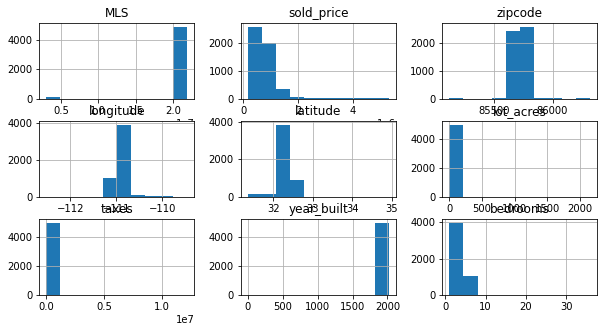

In [4]:
df.hist(figsize=(10,5))

In [5]:
df.describe()

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms
count,5.000000e+03,5.000000e+03,5000.000000,5000.000000,5000.000000,4990.000000,5.000000e+03,5000.00000,5000.000000
mean,2.127070e+07,7.746262e+05,85723.025600,-110.912107,32.308512,4.661317,9.402828e+03,1992.32800,3.933800
std,2.398508e+06,3.185556e+05,38.061712,0.120629,0.178028,51.685230,1.729385e+05,65.48614,1.245362
min,3.042851e+06,1.690000e+05,85118.000000,-112.520168,31.356362,0.000000,0.000000e+00,0.00000,1.000000
25%,2.140718e+07,5.850000e+05,85718.000000,-110.979260,32.277484,0.580000,4.803605e+03,1987.00000,3.000000
50%,2.161469e+07,6.750000e+05,85737.000000,-110.923420,32.318517,0.990000,6.223760e+03,1999.00000,4.000000
75%,2.180480e+07,8.350000e+05,85749.000000,-110.859078,32.394334,1.757500,8.082830e+03,2006.00000,4.000000
max,2.192856e+07,5.300000e+06,86323.000000,-109.454637,34.927884,2154.000000,1.221508e+07,2019.00000,36.000000


In [6]:
df.dtypes

MLS                   int64
sold_price          float64
zipcode               int64
longitude           float64
latitude            float64
lot_acres           float64
taxes               float64
year_built            int64
bedrooms              int64
bathrooms            object
sqrt_ft              object
garage               object
kitchen_features     object
fireplaces           object
floor_covering       object
HOA                  object
dtype: object

In [7]:
df.isna().sum()

MLS                  0
sold_price           0
zipcode              0
longitude            0
latitude             0
lot_acres           10
taxes                0
year_built           0
bedrooms             0
bathrooms            0
sqrt_ft              0
garage               0
kitchen_features     0
fireplaces           0
floor_covering       0
HOA                  0
dtype: int64

In [8]:
df['HOA'].unique()

array(['0', 'None', '55', '422', '220', '421', '141.67', '357', '148',
       '20,000', '142', '173', '167', '123', '300', '194', '1,717', '342',
       '240', '437', '112', '199', '178', '550', '258', '188', '169',
       '124', '320', '213', '153', '105', '159', '193', '69', '208', '50',
       '168', '191', '79', '157', '323', '1,100', '250', '158', '127',
       '149', '83', '118', '219', '88', '180', '259', '128', '117', '48',
       '130', '132', '135', '152', '33', '143', '5', '157.33', '129',
       '171', '273', '162', '131', '134', '211', '203', '190', '145',
       '83.33', '63', '177.34', '57', '115', '166', '184', '164', '125',
       '216', '195', '106', '214', '238', '212.88', '4', '30', '150',
       '19', '160', '138', '141', '146', '1,270', '15', '95', '19,480',
       '116', '311', '94', '21', '295', '57.33', '243', '23', '34', '215',
       '41', '18', '110', '233', '322', '43', '232', '100', '133', '4.16',
       '202', '700', '121', '40', '51', '179', '58', '102',

In [9]:
df['garage'].unique()

array(['0', 'None', '4', '3', '5', '2', '6', '15', '8', '7', '4.5', '3.5',
       '2.5', '1', '9', '22', '30', '12', '10', '11', '20', '13'],
      dtype=object)

In [10]:
df['bathrooms'].unique()

array(['10', '2', '3', '5', '6', '4', '8', '7', '15', '4.5', '1', '9',
       '11', '18', '14', '3.5', 'None', '35', '2.5', '36'], dtype=object)

In [11]:
df['kitchen_features'].unique()

array(['Dishwasher, Freezer, Refrigerator, Oven',
       'Dishwasher, Garbage Disposal',
       'Dishwasher, Garbage Disposal, Refrigerator', ...,
       'Dishwasher, Electric Range, Island, Refrigerator, Reverse Osmosis, Appliance Color: Stainless',
       'Dishwasher, Double Sink, Garbage Disposal, Gas Range, Pantry: Cabinet, Appliance Color: Stainless, Countertops: Granite slab, Microwave: Stainless over oven, Oven: wall',
       'Compactor, Dishwasher, Double Sink, Island, Appliance Color: Stainless'],
      dtype=object)

In [12]:
df['garage'].replace('None', np.nan, inplace=True)
df['bathrooms'].replace('None', np.nan, inplace=True)
df['sqrt_ft'].replace('None', np.nan, inplace=True)


In [13]:
df['garage'].unique()

array(['0', nan, '4', '3', '5', '2', '6', '15', '8', '7', '4.5', '3.5',
       '2.5', '1', '9', '22', '30', '12', '10', '11', '20', '13'],
      dtype=object)

In [14]:
df['HOA'].unique()

array(['0', 'None', '55', '422', '220', '421', '141.67', '357', '148',
       '20,000', '142', '173', '167', '123', '300', '194', '1,717', '342',
       '240', '437', '112', '199', '178', '550', '258', '188', '169',
       '124', '320', '213', '153', '105', '159', '193', '69', '208', '50',
       '168', '191', '79', '157', '323', '1,100', '250', '158', '127',
       '149', '83', '118', '219', '88', '180', '259', '128', '117', '48',
       '130', '132', '135', '152', '33', '143', '5', '157.33', '129',
       '171', '273', '162', '131', '134', '211', '203', '190', '145',
       '83.33', '63', '177.34', '57', '115', '166', '184', '164', '125',
       '216', '195', '106', '214', '238', '212.88', '4', '30', '150',
       '19', '160', '138', '141', '146', '1,270', '15', '95', '19,480',
       '116', '311', '94', '21', '295', '57.33', '243', '23', '34', '215',
       '41', '18', '110', '233', '322', '43', '232', '100', '133', '4.16',
       '202', '700', '121', '40', '51', '179', '58', '102',

In [15]:
df['HOA'].replace('None', np.nan, inplace=True)

In [16]:
df['HOA'].replace(',','', regex=True)

0         0
1         0
2       NaN
3       NaN
4        55
       ... 
4995    NaN
4996     43
4997    NaN
4998    NaN
4999    NaN
Name: HOA, Length: 5000, dtype: object

In [17]:
df['HOA'].dtypes

dtype('O')

In [18]:
df.isna().sum()

MLS                   0
sold_price            0
zipcode               0
longitude             0
latitude              0
lot_acres            10
taxes                 0
year_built            0
bedrooms              0
bathrooms             6
sqrt_ft              56
garage                7
kitchen_features      0
fireplaces            0
floor_covering        0
HOA                 562
dtype: int64

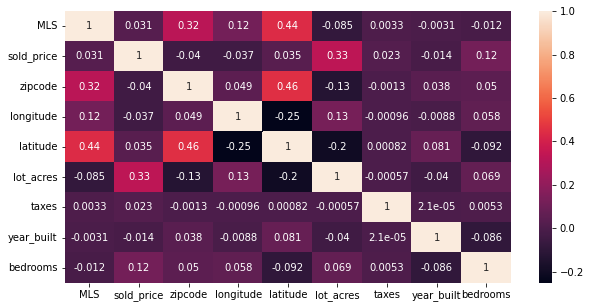

In [19]:
corr = df.corr()
plt.figure(figsize=(10,5))
sns.heatmap(corr, annot = True)


In [20]:
df['HOA']

0         0
1         0
2       NaN
3       NaN
4        55
       ... 
4995    NaN
4996     43
4997    NaN
4998    NaN
4999    NaN
Name: HOA, Length: 5000, dtype: object

In [21]:
df['HOA'].replace(np.nan, '-1', inplace=True)

In [22]:
df['HOA']

0        0
1        0
2       -1
3       -1
4       55
        ..
4995    -1
4996    43
4997    -1
4998    -1
4999    -1
Name: HOA, Length: 5000, dtype: object

In [23]:
df['HOA'].unique()

array(['0', '-1', '55', '422', '220', '421', '141.67', '357', '148',
       '20,000', '142', '173', '167', '123', '300', '194', '1,717', '342',
       '240', '437', '112', '199', '178', '550', '258', '188', '169',
       '124', '320', '213', '153', '105', '159', '193', '69', '208', '50',
       '168', '191', '79', '157', '323', '1,100', '250', '158', '127',
       '149', '83', '118', '219', '88', '180', '259', '128', '117', '48',
       '130', '132', '135', '152', '33', '143', '5', '157.33', '129',
       '171', '273', '162', '131', '134', '211', '203', '190', '145',
       '83.33', '63', '177.34', '57', '115', '166', '184', '164', '125',
       '216', '195', '106', '214', '238', '212.88', '4', '30', '150',
       '19', '160', '138', '141', '146', '1,270', '15', '95', '19,480',
       '116', '311', '94', '21', '295', '57.33', '243', '23', '34', '215',
       '41', '18', '110', '233', '322', '43', '232', '100', '133', '4.16',
       '202', '700', '121', '40', '51', '179', '58', '102', '

In [24]:
df['HOA'] = df.HOA.replace(',','', regex=True)

In [25]:
df['HOA'].unique()

array(['0', '-1', '55', '422', '220', '421', '141.67', '357', '148',
       '20000', '142', '173', '167', '123', '300', '194', '1717', '342',
       '240', '437', '112', '199', '178', '550', '258', '188', '169',
       '124', '320', '213', '153', '105', '159', '193', '69', '208', '50',
       '168', '191', '79', '157', '323', '1100', '250', '158', '127',
       '149', '83', '118', '219', '88', '180', '259', '128', '117', '48',
       '130', '132', '135', '152', '33', '143', '5', '157.33', '129',
       '171', '273', '162', '131', '134', '211', '203', '190', '145',
       '83.33', '63', '177.34', '57', '115', '166', '184', '164', '125',
       '216', '195', '106', '214', '238', '212.88', '4', '30', '150',
       '19', '160', '138', '141', '146', '1270', '15', '95', '19480',
       '116', '311', '94', '21', '295', '57.33', '243', '23', '34', '215',
       '41', '18', '110', '233', '322', '43', '232', '100', '133', '4.16',
       '202', '700', '121', '40', '51', '179', '58', '102', '175',

In [26]:
df['HOA'].astype(float)

0        0.0
1        0.0
2       -1.0
3       -1.0
4       55.0
        ... 
4995    -1.0
4996    43.0
4997    -1.0
4998    -1.0
4999    -1.0
Name: HOA, Length: 5000, dtype: float64

In [27]:
df.isna().sum()

MLS                  0
sold_price           0
zipcode              0
longitude            0
latitude             0
lot_acres           10
taxes                0
year_built           0
bedrooms             0
bathrooms            6
sqrt_ft             56
garage               7
kitchen_features     0
fireplaces           0
floor_covering       0
HOA                  0
dtype: int64

In [28]:
df["sqrt_ft"] = df.sqrt_ft.astype(float)
df["bathrooms"] = df.bathrooms.astype(float)
df["garage"] = df.garage.astype(float)

In [29]:
#col_mean = df["bathrooms"].mean()

In [30]:
#df["bathrooms"].fillna(col_mean, inplace = True)

In [31]:
df.isna().sum()

MLS                  0
sold_price           0
zipcode              0
longitude            0
latitude             0
lot_acres           10
taxes                0
year_built           0
bedrooms             0
bathrooms            6
sqrt_ft             56
garage               7
kitchen_features     0
fireplaces           0
floor_covering       0
HOA                  0
dtype: int64

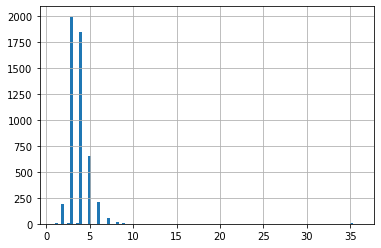

In [32]:
df["bathrooms"].hist(bins = 100)

In [33]:
col_median = df["bathrooms"].median()

In [34]:
df['bathrooms'].fillna(col_median, inplace=True)

In [35]:
df.isna().sum()

MLS                  0
sold_price           0
zipcode              0
longitude            0
latitude             0
lot_acres           10
taxes                0
year_built           0
bedrooms             0
bathrooms            0
sqrt_ft             56
garage               7
kitchen_features     0
fireplaces           0
floor_covering       0
HOA                  0
dtype: int64

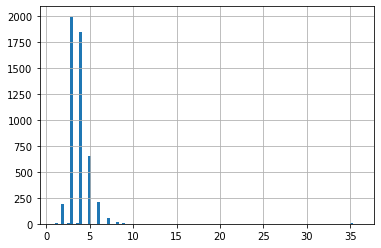

In [36]:
df["bathrooms"].hist(bins = 100)

In [37]:
df['bathrooms'].unique()

array([10. ,  2. ,  3. ,  5. ,  6. ,  4. ,  8. ,  7. , 15. ,  4.5,  1. ,
        9. , 11. , 18. , 14. ,  3.5, 35. ,  2.5, 36. ])

In [38]:
df[df['bathrooms'] == 35.]

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA
2106,3056848,550000.0,85645,-111.047608,31.700763,50.0,25113.45,1936,36,35.0,NaN,NaN,Prep Sink,1,"Ceramic Tile, Mexican Tile",-1
2111,4115949,550000.0,85645,-111.047350,31.701117,50.0,25113.45,1936,36,35.0,22408.0,0.0,Countertops: Stainless,1,"Ceramic Tile, Mexican Tile",-1
3277,21623780,695000.0,85645,-111.047260,31.701407,50.0,6520.66,1936,36,35.0,21915.0,0.0,Refrigerator,1,"Ceramic Tile, Mexican Tile",0


In [39]:
df[df['bathrooms'] == 36.]

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA
4663,21832887,575359.5,85641,-110.687945,32.081978,1.07,625.0,2019,5,36.0,3720.0,3.0,"Dishwasher, Double Sink, Garbage Disposal, Gas...",1,"Carpet, Ceramic Tile",-1


In [40]:
df = df.drop(df.index[[2106, 2111, 3277, 4663]], axis= 0)

In [41]:
df.head()

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA
0,21530491,5300000.0,85637,-110.378200,31.356362,2154.00,5272.00,1941,13,10.0,10500.0,0.0,"Dishwasher, Freezer, Refrigerator, Oven",6,"Mexican Tile, Wood",0
1,21529082,4200000.0,85646,-111.045371,31.594213,1707.00,10422.36,1997,2,2.0,7300.0,0.0,"Dishwasher, Garbage Disposal",5,"Natural Stone, Other",0
2,3054672,4200000.0,85646,-111.040707,31.594844,1707.00,10482.00,1997,2,3.0,NaN,NaN,"Dishwasher, Garbage Disposal, Refrigerator",5,"Natural Stone, Other: Rock",-1
3,21919321,4500000.0,85646,-111.035925,31.645878,636.67,8418.58,1930,7,5.0,9019.0,4.0,"Dishwasher, Double Sink, Pantry: Butler, Refri...",4,"Ceramic Tile, Laminate, Wood",-1
4,21306357,3411450.0,85750,-110.813768,32.285162,3.21,15393.00,1995,4,6.0,6396.0,3.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5,"Carpet, Concrete",55


In [42]:
df[df['bathrooms'] == 36.]

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA


In [43]:
df[df['bathrooms'] == 35.]

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA


In [44]:
df.isna().sum()

MLS                  0
sold_price           0
zipcode              0
longitude            0
latitude             0
lot_acres           10
taxes                0
year_built           0
bedrooms             0
bathrooms            0
sqrt_ft             55
garage               6
kitchen_features     0
fireplaces           0
floor_covering       0
HOA                  0
dtype: int64

In [45]:
df['garage'].unique()

array([ 0. ,  nan,  4. ,  3. ,  5. ,  2. ,  6. , 15. ,  8. ,  7. ,  4.5,
        3.5,  2.5,  1. ,  9. , 22. , 30. , 12. , 10. , 11. , 20. , 13. ])

In [46]:
df['bathrooms'].unique()

array([10. ,  2. ,  3. ,  5. ,  6. ,  4. ,  8. ,  7. , 15. ,  4.5,  1. ,
        9. , 11. , 18. , 14. ,  3.5,  2.5])

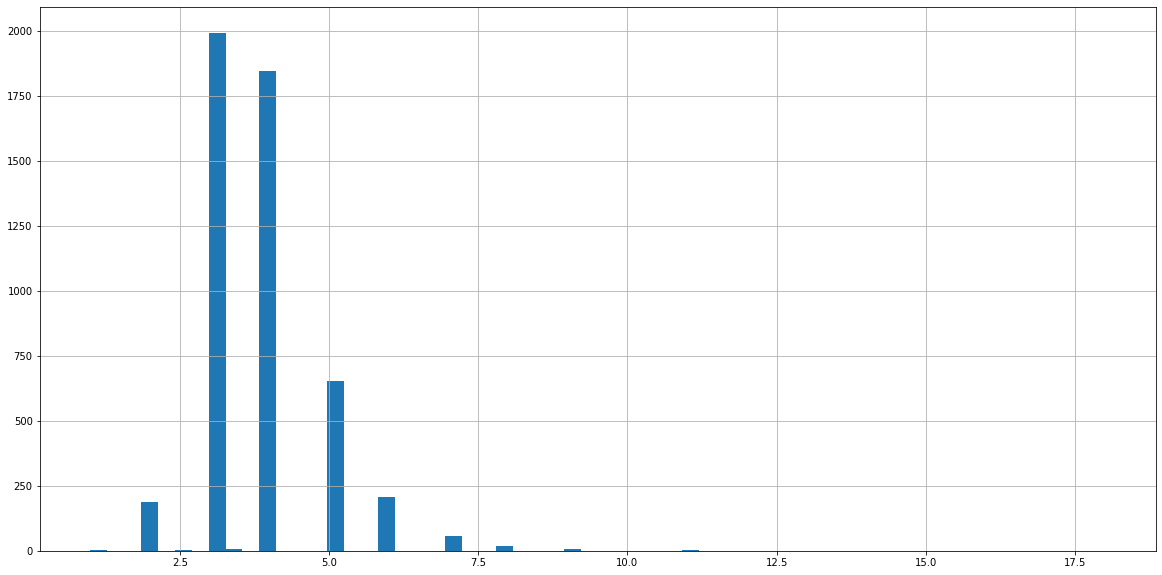

In [47]:
df['bathrooms'].hist(bins = 60, figsize=(20, 10))

In [48]:
df.isna().sum()

MLS                  0
sold_price           0
zipcode              0
longitude            0
latitude             0
lot_acres           10
taxes                0
year_built           0
bedrooms             0
bathrooms            0
sqrt_ft             55
garage               6
kitchen_features     0
fireplaces           0
floor_covering       0
HOA                  0
dtype: int64

In [49]:
col_mean3= df["lot_acres"].mean()
df["lot_acres"].unique()

array([2.15400e+03, 1.70700e+03, 6.36670e+02, 3.21000e+00, 1.67000e+00,
       2.10000e+00, 1.07000e+00, 6.73000e+00, 3.53000e+00, 1.47180e+02,
       1.65000e+00, 2.96000e+01, 1.82000e+00, 0.00000e+00, 3.10000e+00,
       1.25000e+00, 9.30000e+01, 6.40000e-01, 3.42000e+00, 1.31600e+01,
       2.84000e+00, 1.50000e-01, 1.30000e+01, 1.27000e+00, 1.04818e+03,
       1.55000e+00, 1.01000e+00, 1.16000e+00, 3.22000e+00, 1.91000e+00,
       1.31000e+02, 3.72000e+00, 2.20000e+00, 7.70000e-01, 1.08000e+00,
       2.66000e+00, 1.26000e+00, 3.16000e+00, 9.10000e-01, 1.14000e+00,
       8.41000e+00, 5.93000e+01, 1.32000e+00, 1.90000e+01, 1.18000e+00,
       3.26000e+00, 1.09000e+00, 1.31000e+00, 6.30000e-01, 1.15000e+00,
       1.03000e+02, 2.73030e+02, 3.57000e+00, 4.60000e-01, 1.04000e+00,
       1.88000e+00, 1.22000e+00, 1.42000e+00, 1.97000e+00, 5.28000e+00,
       1.57000e+00, 4.15000e+00, 8.60000e-01, 1.81700e+01, 1.30000e+00,
       2.22000e+00, 1.17000e+00, 3.81000e+00, 1.02000e+00, 3.200

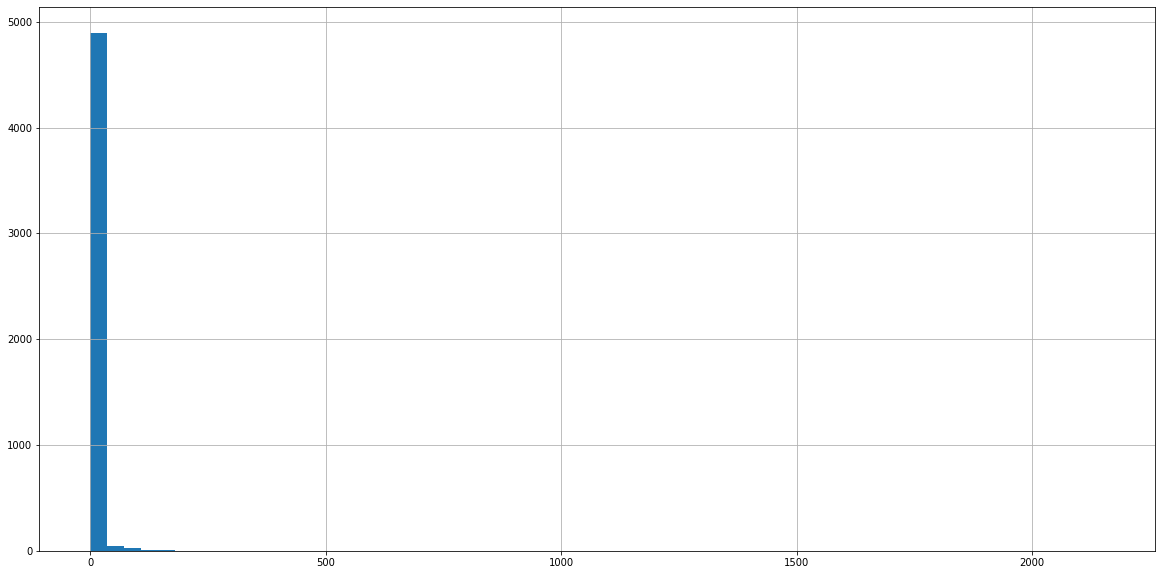

In [50]:
df['lot_acres'].hist(bins = 60, figsize=(20, 10))

In [51]:
df['lot_acres'].fillna(col_mean3, inplace=True)

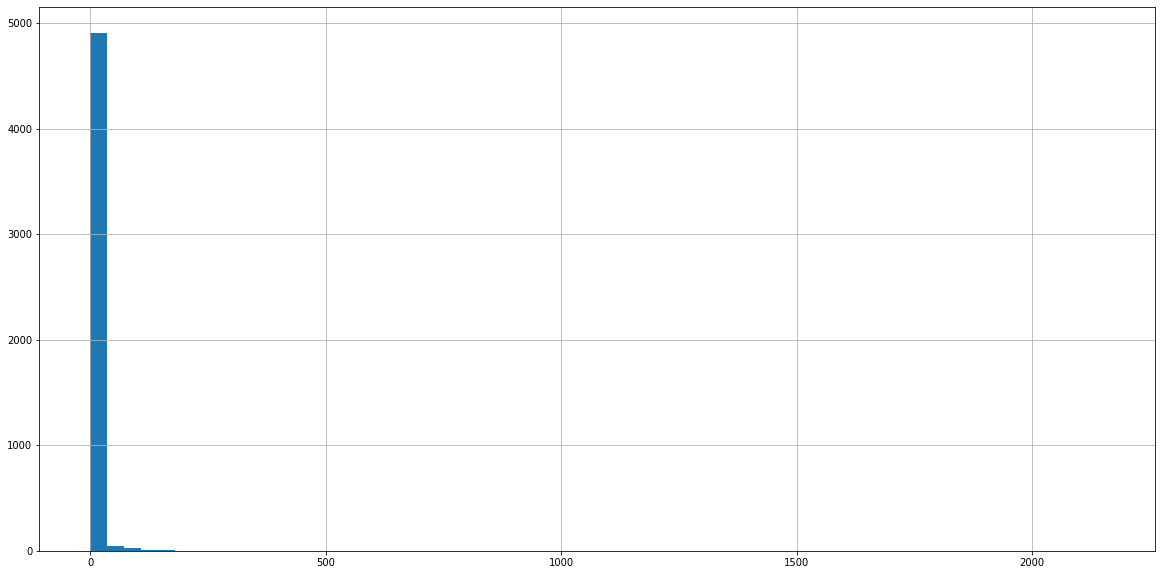

In [52]:
df['lot_acres'].hist(bins = 60, figsize=(20, 10))

In [53]:
col_median3 = df["lot_acres"].median()

In [54]:
df['lot_acres'].fillna(col_mean3, inplace=True)

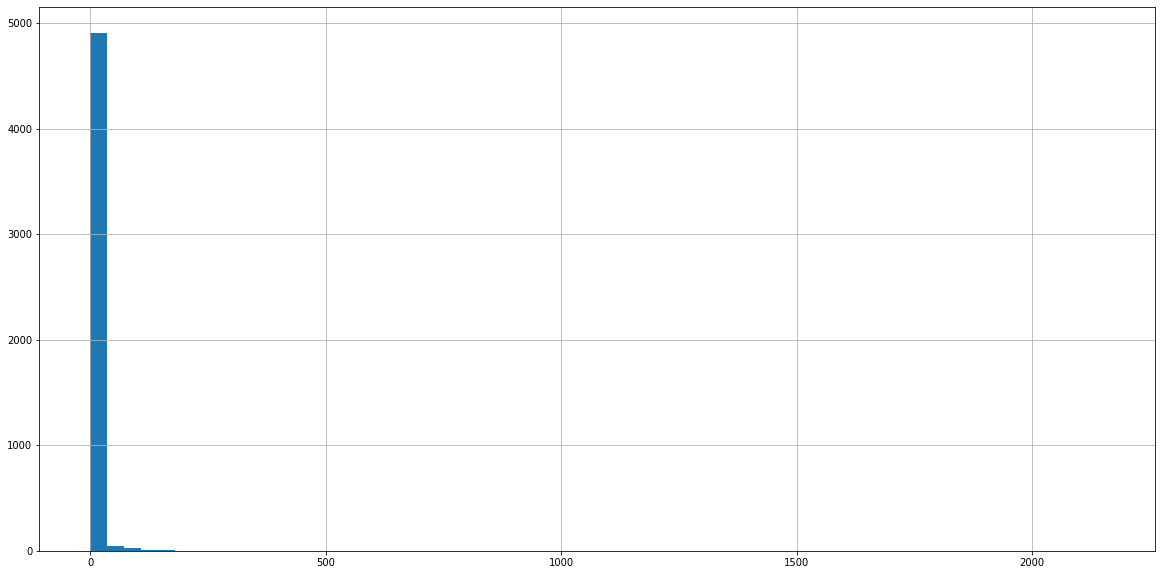

In [55]:
df['lot_acres'].hist(bins = 60, figsize=(20, 10))

In [56]:
df.isna().sum()

MLS                  0
sold_price           0
zipcode              0
longitude            0
latitude             0
lot_acres            0
taxes                0
year_built           0
bedrooms             0
bathrooms            0
sqrt_ft             55
garage               6
kitchen_features     0
fireplaces           0
floor_covering       0
HOA                  0
dtype: int64

In [57]:
df['garage'].unique()

array([ 0. ,  nan,  4. ,  3. ,  5. ,  2. ,  6. , 15. ,  8. ,  7. ,  4.5,
        3.5,  2.5,  1. ,  9. , 22. , 30. , 12. , 10. , 11. , 20. , 13. ])

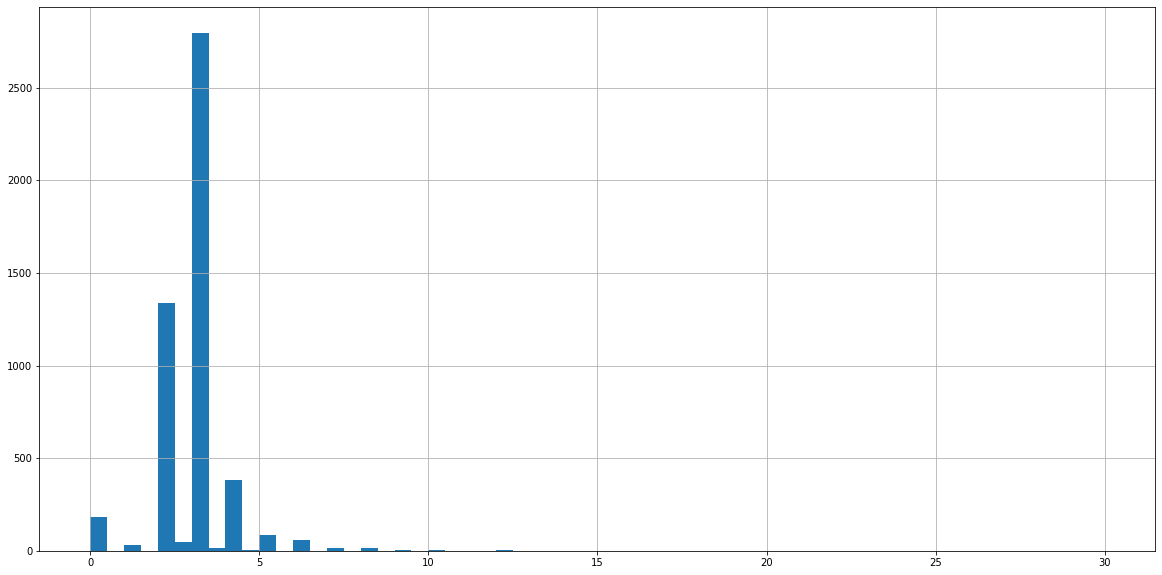

In [58]:
df['garage'].hist(bins = 60, figsize=(20, 10))

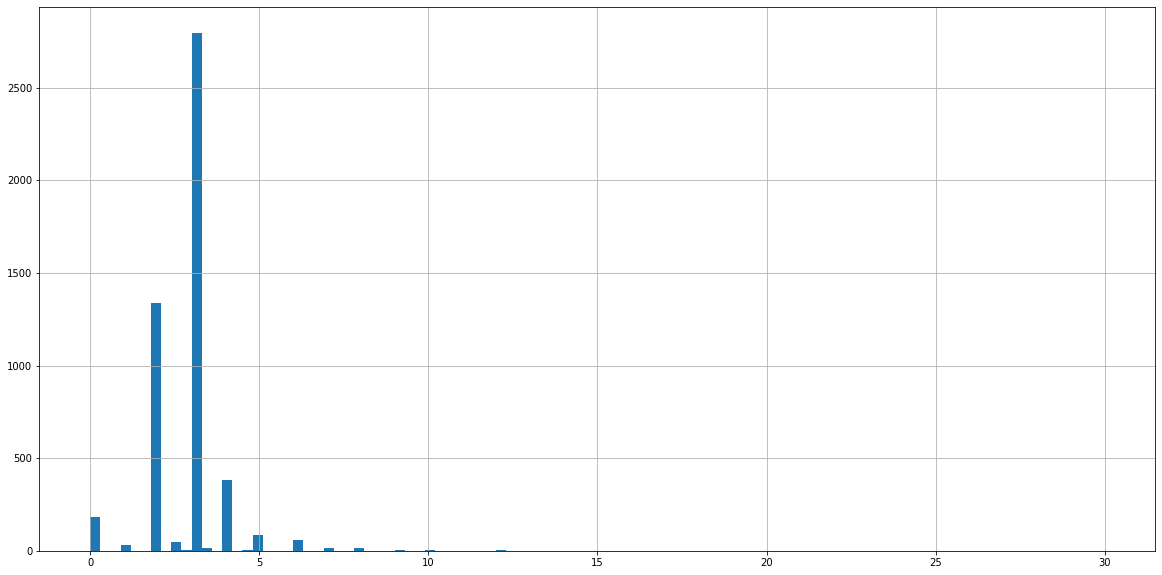

In [59]:
col_mean4= df["garage"].mean()
df["garage"].fillna(col_mean4, inplace=True)
df['garage'].hist(bins = 100, figsize=(20, 10))

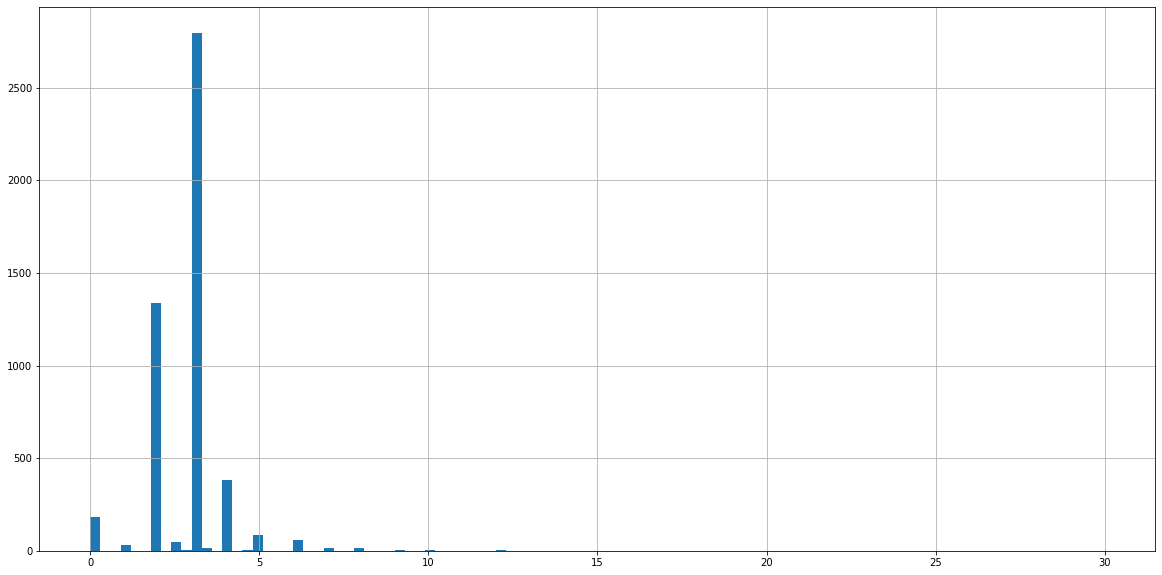

In [60]:
col_median4= df["garage"].median()
df["garage"].fillna(col_median4, inplace=True)
df['garage'].hist(bins = 100, figsize=(20, 10))

In [61]:
df.isna().sum()

MLS                  0
sold_price           0
zipcode              0
longitude            0
latitude             0
lot_acres            0
taxes                0
year_built           0
bedrooms             0
bathrooms            0
sqrt_ft             55
garage               0
kitchen_features     0
fireplaces           0
floor_covering       0
HOA                  0
dtype: int64

In [62]:
df['sqrt_ft'].unique()

array([10500.,  7300.,    nan, ...,  2106.,  3601.,  1772.])

In [63]:
df['sqrt_ft'].dtype

dtype('float64')

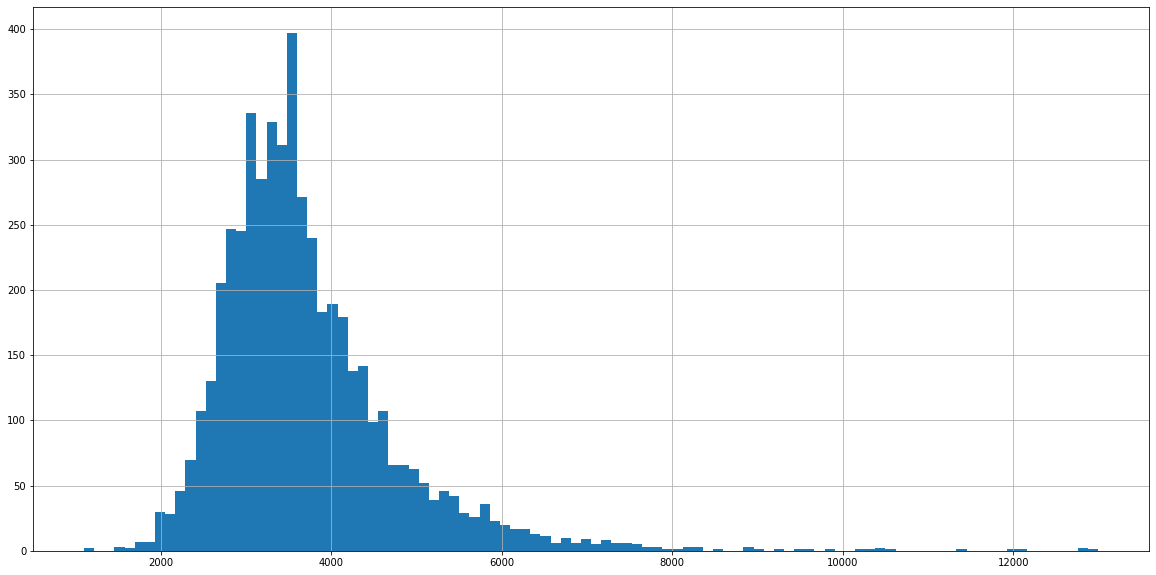

In [64]:
col_median5= df['sqrt_ft'].median()
df['sqrt_ft'].fillna(col_median5, inplace=True)
df['sqrt_ft'].hist(bins = 100, figsize=(20, 10))

In [65]:
df.isna().sum()

MLS                 0
sold_price          0
zipcode             0
longitude           0
latitude            0
lot_acres           0
taxes               0
year_built          0
bedrooms            0
bathrooms           0
sqrt_ft             0
garage              0
kitchen_features    0
fireplaces          0
floor_covering      0
HOA                 0
dtype: int64

In [66]:
df.head()

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA
0,21530491,5300000.0,85637,-110.378200,31.356362,2154.00,5272.00,1941,13,10.0,10500.0,0.000000,"Dishwasher, Freezer, Refrigerator, Oven",6,"Mexican Tile, Wood",0
1,21529082,4200000.0,85646,-111.045371,31.594213,1707.00,10422.36,1997,2,2.0,7300.0,0.000000,"Dishwasher, Garbage Disposal",5,"Natural Stone, Other",0
2,3054672,4200000.0,85646,-111.040707,31.594844,1707.00,10482.00,1997,2,3.0,3511.0,2.817234,"Dishwasher, Garbage Disposal, Refrigerator",5,"Natural Stone, Other: Rock",-1
3,21919321,4500000.0,85646,-111.035925,31.645878,636.67,8418.58,1930,7,5.0,9019.0,4.000000,"Dishwasher, Double Sink, Pantry: Butler, Refri...",4,"Ceramic Tile, Laminate, Wood",-1
4,21306357,3411450.0,85750,-110.813768,32.285162,3.21,15393.00,1995,4,6.0,6396.0,3.000000,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5,"Carpet, Concrete",55


In [67]:
df = df.drop('kitchen_features', axis=1)

In [68]:
df = df.drop('floor_covering', axis=1)

In [69]:
df.shape

(4996, 14)

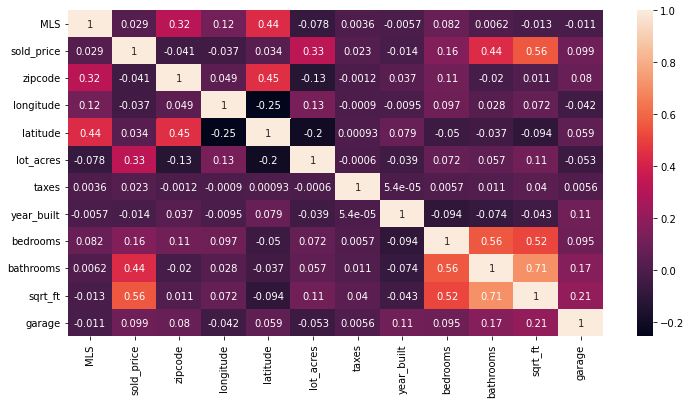

In [70]:
corr = df.corr()
plt.figure(figsize=(12,6))
sns.heatmap(corr, annot = True)


In [71]:
df['lot_acres'].unique() 

array([2.15400000e+03, 1.70700000e+03, 6.36670000e+02, 3.21000000e+00,
       1.67000000e+00, 2.10000000e+00, 1.07000000e+00, 6.73000000e+00,
       3.53000000e+00, 1.47180000e+02, 1.65000000e+00, 2.96000000e+01,
       1.82000000e+00, 0.00000000e+00, 3.10000000e+00, 1.25000000e+00,
       9.30000000e+01, 6.40000000e-01, 3.42000000e+00, 1.31600000e+01,
       2.84000000e+00, 1.50000000e-01, 1.30000000e+01, 1.27000000e+00,
       1.04818000e+03, 1.55000000e+00, 1.01000000e+00, 1.16000000e+00,
       3.22000000e+00, 1.91000000e+00, 1.31000000e+02, 3.72000000e+00,
       2.20000000e+00, 7.70000000e-01, 1.08000000e+00, 2.66000000e+00,
       1.26000000e+00, 3.16000000e+00, 9.10000000e-01, 1.14000000e+00,
       8.41000000e+00, 5.93000000e+01, 1.32000000e+00, 1.90000000e+01,
       1.18000000e+00, 3.26000000e+00, 1.09000000e+00, 1.31000000e+00,
       6.30000000e-01, 1.15000000e+00, 1.03000000e+02, 2.73030000e+02,
       3.57000000e+00, 4.60000000e-01, 1.04000000e+00, 1.88000000e+00,
      

In [72]:
df['N_F'] = df['sold_price']/df['sqrt_ft']

In [73]:
df.head()

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,fireplaces,HOA,N_F
0,21530491,5300000.0,85637,-110.378200,31.356362,2154.00,5272.00,1941,13,10.0,10500.0,0.000000,6,0,504.761905
1,21529082,4200000.0,85646,-111.045371,31.594213,1707.00,10422.36,1997,2,2.0,7300.0,0.000000,5,0,575.342466
2,3054672,4200000.0,85646,-111.040707,31.594844,1707.00,10482.00,1997,2,3.0,3511.0,2.817234,5,-1,1196.240387
3,21919321,4500000.0,85646,-111.035925,31.645878,636.67,8418.58,1930,7,5.0,9019.0,4.000000,4,-1,498.946668
4,21306357,3411450.0,85750,-110.813768,32.285162,3.21,15393.00,1995,4,6.0,6396.0,3.000000,5,55,533.372420


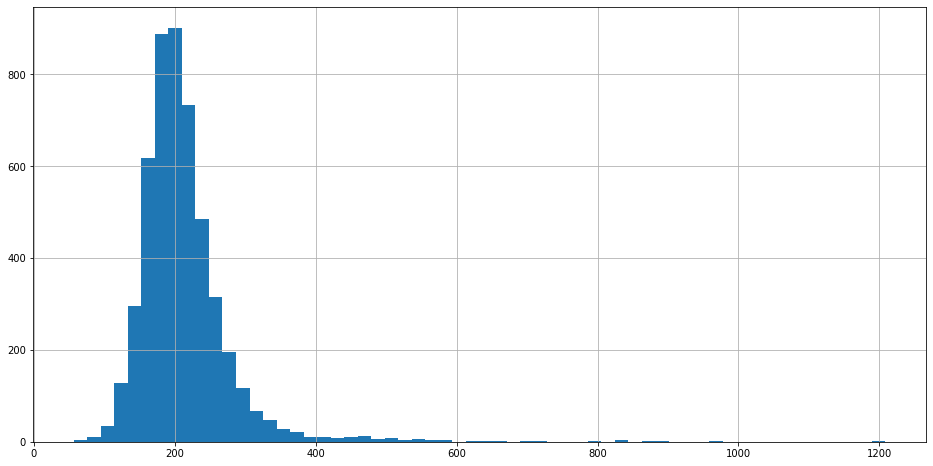

In [74]:
df['N_F'].hist(bins = 60, figsize=(16, 8))

In [75]:
def classifier(columns):
  if columns <= 200:
    return 1
  elif columns > 200 and columns <= 400:
    return 2
  elif columns > 400 and columns <= 600:
    return 3
  else:
    return 4





In [76]:
df['C-F']=df['N_F'].map(lambda x: classifier(x))

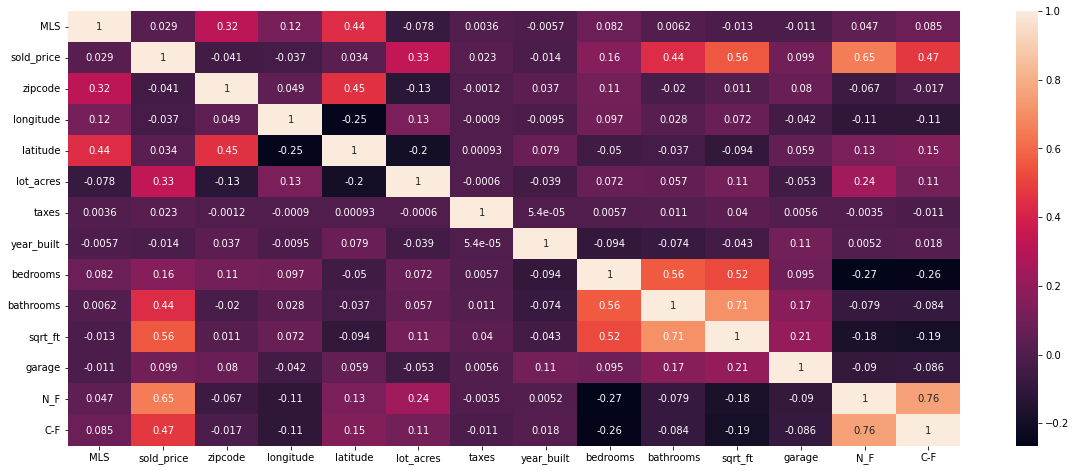

In [77]:
corr = df.corr()
plt.figure(figsize=(20,8))
sns.heatmap(corr, annot = True)

In [78]:
df.head(100)

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,fireplaces,HOA,N_F,C-F
0,21530491,5300000.0,85637,-110.378200,31.356362,2154.00,5272.00,1941,13,10.0,10500.0,0.000000,6,0,504.761905,3
1,21529082,4200000.0,85646,-111.045371,31.594213,1707.00,10422.36,1997,2,2.0,7300.0,0.000000,5,0,575.342466,3
2,3054672,4200000.0,85646,-111.040707,31.594844,1707.00,10482.00,1997,2,3.0,3511.0,2.817234,5,-1,1196.240387,4
3,21919321,4500000.0,85646,-111.035925,31.645878,636.67,8418.58,1930,7,5.0,9019.0,4.000000,4,-1,498.946668,3
4,21306357,3411450.0,85750,-110.813768,32.285162,3.21,15393.00,1995,4,6.0,6396.0,3.000000,5,55,533.372420,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,21317138,1680000.0,85750,-110.866463,32.331701,1.26,3646.42,2013,5,5.0,5432.0,4.000000,3,220,309.278351,2
96,21221092,1750000.0,85658,-111.095519,32.471311,0.47,11139.10,2008,4,5.0,4724.0,3.000000,2,550,370.448772,2
97,21901825,1937000.0,85658,-111.093751,32.470017,0.58,1989.90,2019,4,5.0,3620.0,3.000000,2,550,535.082873,3
98,21409831,1831392.0,85658,-111.097132,32.468215,0.46,1609.59,2015,3,4.0,3276.0,2.000000,2,550,559.032967,3


In [79]:
df.columns

Index(['MLS', 'sold_price', 'zipcode', 'longitude', 'latitude', 'lot_acres',
       'taxes', 'year_built', 'bedrooms', 'bathrooms', 'sqrt_ft', 'garage',
       'fireplaces', 'HOA', 'N_F', 'C-F'],
      dtype='object')

In [80]:
ndf = df.loc[:,[ 'sold_price', 'longitude', 'latitude', 'bedrooms', 'bathrooms', 'sqrt_ft', 'C-F']]

In [81]:
X = ndf.to_numpy()
random.shuffle(X)
train_data = X[:int((len(X)+1)*.90)] #Remaining 90% to training set
test_data = X[int((len(X)+1)*.90):] #Splits 10% data to test set

In [82]:
train_data.shape



(4497, 7)

In [83]:
test_data.shape

(499, 7)

In [84]:
X

array([[ 5.30000000e+06, -1.10378200e+02,  3.13563620e+01, ...,
         1.00000000e+01,  1.05000000e+04,  3.00000000e+00],
       [ 4.20000000e+06, -1.11045371e+02,  3.15942130e+01, ...,
         2.00000000e+00,  7.30000000e+03,  3.00000000e+00],
       [ 4.20000000e+06, -1.11045371e+02,  3.15942130e+01, ...,
         2.00000000e+00,  7.30000000e+03,  3.00000000e+00],
       ...,
       [ 8.25000000e+05, -1.11059711e+02,  3.24776910e+01, ...,
         3.00000000e+00,  3.19300000e+03,  2.00000000e+00],
       [ 6.78751730e+05, -1.10983817e+02,  3.24652000e+01, ...,
         3.00000000e+00,  2.55000000e+03,  2.00000000e+00],
       [ 8.50000000e+05, -1.10860943e+02,  3.22768200e+01, ...,
         3.00000000e+00,  3.82600000e+03,  2.00000000e+00]])

In [85]:
X.shape

(4996, 7)

In [86]:
class KNNClassifier():
  def fit(self, x,y):
    self.x=x
    self.y=y.astype(int)
  def predict(self,x,k,epsilon=1e-3):
    N=len(x)
    y_hat = np.zeros(N)
    for i in range(N):
      #distance between one point to all other point
      dist2=np.sum((self.x-x[i])**2, axis=1)
      idxt=np.argsort(dist2)[:k]
      gamma_k = 1/(np.sqrt(dist2[idxt] + epsilon))
      y_hat[i] = np.bincount(self.y[idxt], weights = gamma_k).argmax()
    return y_hat

In [87]:
Gnb = KNNClassifier()

In [88]:
train_data

array([[ 5.30000000e+06, -1.10378200e+02,  3.13563620e+01, ...,
         1.00000000e+01,  1.05000000e+04,  3.00000000e+00],
       [ 4.20000000e+06, -1.11045371e+02,  3.15942130e+01, ...,
         2.00000000e+00,  7.30000000e+03,  3.00000000e+00],
       [ 4.20000000e+06, -1.11045371e+02,  3.15942130e+01, ...,
         2.00000000e+00,  7.30000000e+03,  3.00000000e+00],
       ...,
       [ 5.55000000e+05, -1.10756023e+02,  3.22736060e+01, ...,
         3.00000000e+00,  2.92800000e+03,  1.00000000e+00],
       [ 2.00000000e+06, -1.10862142e+02,  3.22646950e+01, ...,
         5.00000000e+00,  3.96900000e+03,  3.00000000e+00],
       [ 5.65000000e+05, -1.10936021e+02,  3.22346300e+01, ...,
         3.00000000e+00,  2.97200000e+03,  1.00000000e+00]])

In [89]:
y_train = train_data[:,-1]

In [90]:
y_train

array([3., 3., 3., ..., 1., 3., 1.])

In [91]:
X_train = train_data[:,:-1]

In [92]:
def min_max_scaling(column):
    return (column - column.min())/(column.max() - column.min())

In [93]:
X_train

array([[ 5.30000000e+06, -1.10378200e+02,  3.13563620e+01,
         1.30000000e+01,  1.00000000e+01,  1.05000000e+04],
       [ 4.20000000e+06, -1.11045371e+02,  3.15942130e+01,
         2.00000000e+00,  2.00000000e+00,  7.30000000e+03],
       [ 4.20000000e+06, -1.11045371e+02,  3.15942130e+01,
         2.00000000e+00,  2.00000000e+00,  7.30000000e+03],
       ...,
       [ 5.55000000e+05, -1.10756023e+02,  3.22736060e+01,
         5.00000000e+00,  3.00000000e+00,  2.92800000e+03],
       [ 2.00000000e+06, -1.10862142e+02,  3.22646950e+01,
         3.00000000e+00,  5.00000000e+00,  3.96900000e+03],
       [ 5.65000000e+05, -1.10936021e+02,  3.22346300e+01,
         5.00000000e+00,  3.00000000e+00,  2.97200000e+03]])

In [94]:
X_train

array([[ 5.30000000e+06, -1.10378200e+02,  3.13563620e+01,
         1.30000000e+01,  1.00000000e+01,  1.05000000e+04],
       [ 4.20000000e+06, -1.11045371e+02,  3.15942130e+01,
         2.00000000e+00,  2.00000000e+00,  7.30000000e+03],
       [ 4.20000000e+06, -1.11045371e+02,  3.15942130e+01,
         2.00000000e+00,  2.00000000e+00,  7.30000000e+03],
       ...,
       [ 5.55000000e+05, -1.10756023e+02,  3.22736060e+01,
         5.00000000e+00,  3.00000000e+00,  2.92800000e+03],
       [ 2.00000000e+06, -1.10862142e+02,  3.22646950e+01,
         3.00000000e+00,  5.00000000e+00,  3.96900000e+03],
       [ 5.65000000e+05, -1.10936021e+02,  3.22346300e+01,
         5.00000000e+00,  3.00000000e+00,  2.97200000e+03]])

In [95]:
Gnb.fit(X_train, y_train)

In [96]:
y_test = test_data[:,-1]

In [97]:
y_test

array([1., 1., 1., 1., 2., 2., 4., 1., 1., 2., 2., 2., 2., 1., 2., 1., 1.,
       2., 1., 2., 1., 2., 2., 3., 1., 4., 2., 2., 1., 1., 2., 2., 2., 2.,
       1., 1., 2., 1., 1., 1., 1., 1., 1., 2., 2., 1., 2., 2., 1., 2., 2.,
       2., 1., 1., 1., 1., 1., 2., 1., 1., 2., 2., 1., 2., 2., 2., 2., 2.,
       2., 2., 1., 1., 2., 2., 1., 2., 1., 1., 2., 2., 1., 2., 2., 2., 1.,
       1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 2., 2., 1., 1., 2., 2., 2.,
       1., 2., 2., 2., 2., 1., 2., 2., 1., 1., 2., 2., 2., 2., 1., 2., 2.,
       2., 1., 1., 1., 2., 1., 1., 2., 3., 1., 1., 2., 1., 1., 2., 1., 2.,
       2., 1., 2., 2., 1., 1., 2., 2., 2., 1., 2., 1., 1., 2., 1., 1., 1.,
       2., 1., 2., 2., 1., 2., 2., 1., 1., 1., 2., 2., 2., 2., 2., 1., 2.,
       1., 2., 1., 2., 3., 2., 1., 1., 2., 1., 1., 2., 1., 1., 2., 1., 2.,
       1., 1., 2., 1., 1., 1., 1., 1., 2., 1., 2., 1., 1., 2., 1., 1., 2.,
       2., 2., 1., 2., 2., 2., 1., 2., 2., 2., 1., 2., 2., 2., 2., 1., 1.,
       1., 3., 2., 1., 1.

In [98]:
X_test = test_data[:,:-1]

In [99]:
X_test

array([[ 6.97000000e+05, -1.11078495e+02,  3.23978290e+01,
         4.00000000e+00,  5.00000000e+00,  4.02300000e+03],
       [ 6.81000000e+05, -1.10954534e+02,  3.23510660e+01,
         4.00000000e+00,  4.00000000e+00,  3.98800000e+03],
       [ 1.05000000e+06, -1.10859545e+02,  3.22570890e+01,
         6.00000000e+00,  5.00000000e+00,  5.34000000e+03],
       ...,
       [ 8.25000000e+05, -1.11059711e+02,  3.24776910e+01,
         2.00000000e+00,  3.00000000e+00,  3.19300000e+03],
       [ 6.78751730e+05, -1.10983817e+02,  3.24652000e+01,
         3.00000000e+00,  3.00000000e+00,  2.55000000e+03],
       [ 8.50000000e+05, -1.10860943e+02,  3.22768200e+01,
         4.00000000e+00,  3.00000000e+00,  3.82600000e+03]])

In [100]:
X_test

array([[ 6.97000000e+05, -1.11078495e+02,  3.23978290e+01,
         4.00000000e+00,  5.00000000e+00,  4.02300000e+03],
       [ 6.81000000e+05, -1.10954534e+02,  3.23510660e+01,
         4.00000000e+00,  4.00000000e+00,  3.98800000e+03],
       [ 1.05000000e+06, -1.10859545e+02,  3.22570890e+01,
         6.00000000e+00,  5.00000000e+00,  5.34000000e+03],
       ...,
       [ 8.25000000e+05, -1.11059711e+02,  3.24776910e+01,
         2.00000000e+00,  3.00000000e+00,  3.19300000e+03],
       [ 6.78751730e+05, -1.10983817e+02,  3.24652000e+01,
         3.00000000e+00,  3.00000000e+00,  2.55000000e+03],
       [ 8.50000000e+05, -1.10860943e+02,  3.22768200e+01,
         4.00000000e+00,  3.00000000e+00,  3.82600000e+03]])

In [101]:
y_hat1 = Gnb.predict(X_test, 15)

In [102]:
y_hat1.shape

(499,)

In [103]:
y_hat2 = Gnb.predict(X_train, 10)

In [104]:
def accuracy(y, y_hat):
  return np.mean(y==y_hat)

In [105]:
accuracy(y_test, y_hat1)

0.9178356713426854

In [106]:
accuracy(y_train, y_hat2)

1.0

In [107]:
range1 = (df['C-F'] == 1)

In [108]:
range1_df = df.loc[range1, ['MLS', 'sold_price', 'zipcode', 'longitude', 'latitude', 'lot_acres', 'taxes', 'year_built', 'bedrooms', 'bathrooms', 'sqrt_ft', 'garage','fireplaces', 'N_F', 'C-F']]

In [109]:
range1_df.shape

(2372, 15)

In [110]:
range1_df.head()

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,fireplaces,N_F,C-F
6,21610478,2400000.0,85712,-110.883315,32.261069,2.10,19038.42,2001,9,8.0,12025.0,4.0,6,199.584200,1
35,21307177,2495000.0,85637,-110.740635,31.720431,131.00,1220.32,0,13,15.0,13000.0,0.0,4,191.923077,1
67,21229338,1800000.0,85712,-110.883315,32.261069,2.10,23156.58,2001,9,8.0,10258.0,4.0,6,175.472802,1
137,21419211,1350000.0,85750,-110.839258,32.325702,1.10,14634.00,1998,5,6.0,6756.0,4.0,2,199.822380,1
141,21815257,169000.0,85648,-110.918513,31.451945,0.52,80.83,2018,4,3.0,1700.0,2.0,0,99.411765,1


In [111]:
range2 = (df['C-F'] == 2)

In [112]:
range2_df = df.loc[range2, ['MLS', 'sold_price', 'zipcode', 'longitude', 'latitude', 'lot_acres', 'taxes', 'year_built', 'bedrooms', 'bathrooms', 'sqrt_ft', 'garage','fireplaces', 'N_F', 'C-F']]

In [113]:
range2_df.shape

(2534, 15)

In [114]:
range3 = (df['C-F'] == 3)

In [115]:
range3_df = df.loc[range3, ['MLS', 'sold_price', 'zipcode', 'longitude', 'latitude', 'lot_acres', 'taxes', 'year_built', 'bedrooms', 'bathrooms', 'sqrt_ft', 'garage','fireplaces','N_F', 'C-F']]

In [116]:
range3_df.shape

(75, 15)

In [117]:
range4 = (df['C-F'] == 4)

In [118]:
range4_df = df.loc[range4, ['MLS', 'sold_price', 'zipcode', 'longitude', 'latitude', 'lot_acres', 'taxes', 'year_built', 'bedrooms', 'bathrooms', 'sqrt_ft', 'garage','fireplaces','N_F', 'C-F']]

In [119]:
range4_df.shape

(15, 15)

In [120]:
class OurLinearRegression():
  def fit(self, X, y, eta=1e-3, epochs=1e3, show_curve= False):
    epochs = int(epochs)
    N, D = X.shape
    Y = y
    #Stochastic Gradient Decendent
    #Initialize the weights
    self.W = np.random.randn(D)

    J=np.zeros(epochs)

    #Gradient Descent Step
    for epoch in range(epochs):
      Y_hat = self.predict(X)
      J[epoch] = OLS(Y, Y_hat, N) #Calculate Error/loss
      #Weights update rule
      self.W -= eta*(1/N)*(X.T@(Y_hat-Y))
    if show_curve:
      plt.figure()
      plt.plot(J)
      plt.xlabel("epochs")
      plt.ylabel("$\mathcal{J}$")
      plt.title("Training Curve")
      plt.show()
  def predict(self, X):
    return X@self.W

In [121]:
def OLS(Y, Y_hat, N):
  return (1/(2^N)*np.sum((Y-Y_hat)**2))
def R2(Y, Y_hat):
  return (1-(np.sum((Y-Y_hat)**2)/np.sum((Y-np.mean(Y))**2)))

### Range1

In [122]:
range1_df.columns

Index(['MLS', 'sold_price', 'zipcode', 'longitude', 'latitude', 'lot_acres',
       'taxes', 'year_built', 'bedrooms', 'bathrooms', 'sqrt_ft', 'garage',
       'fireplaces', 'N_F', 'C-F'],
      dtype='object')

In [123]:
X_range1 = range1_df[['sqrt_ft', 'bedrooms' , 'lot_acres', 'N_F','sold_price']].copy()

In [124]:
X_range1.shape

(2372, 5)

In [125]:
def min_max_scaling(column):
    return (column - column.min())/(column.max() - column.min())

In [126]:
XR1 = X_range1.to_numpy()
#XR1 = min_max_scaling(XR1)
random.shuffle(XR1)
trainR1_data = XR1[:int((len(XR1)+1)*.90)] #Remaining 90% to training set
testR1_data = XR1[int((len(XR1)+1)*.90):] #Splits 10% data to test set

In [127]:
trainR1_data.shape

(2135, 5)

In [128]:
testR1_data.shape

(237, 5)

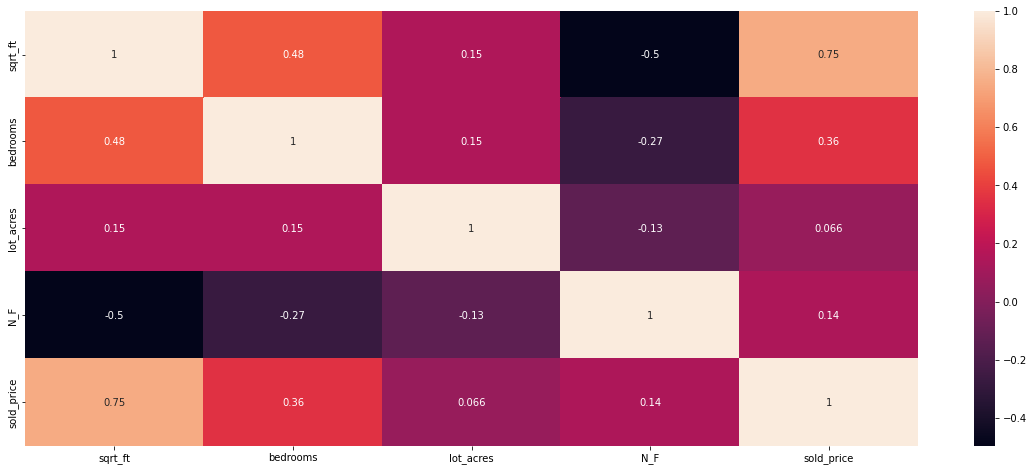

In [129]:
corr = X_range1.corr()
plt.figure(figsize=(20,8))
sns.heatmap(corr, annot = True)

In [130]:
y_range1Tr=trainR1_data[:,0]

In [131]:
y_range1Tr

array([12025., 12025., 10258., ...,  6242.,  5665.,  7284.])

In [132]:
y_range1Tr.shape

(2135,)

In [133]:
X_range1Tr=trainR1_data[:,1:]

In [134]:
X_range1Tr.shape

(2135, 4)

In [135]:
y_range1Te=testR1_data[:,0]

In [136]:
y_range1Te.shape

(237,)

In [137]:
X_range1Te=testR1_data[:,1:]

In [138]:
X_range1Te.shape

(237, 4)

In [139]:
Reg = OurLinearRegression()

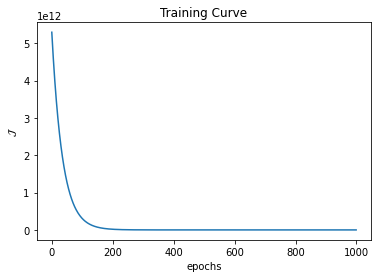

In [172]:
Reg.fit(X_range1Tr, y_range1Tr, epochs = 1e3, eta=1e-14, show_curve=True)

In [141]:
y_hatR1Te=Reg.predict(X_range1Te)

In [142]:
R2(y_range1Te,y_hatR1Te)

0.5932688381735663

In [143]:
y_hatR1Tr=Reg.predict(X_range1Tr)

In [144]:
R2(y_range1Tr,y_hatR1Tr)

0.67222773444424

### Range 2

In [145]:
X_range2 = range2_df[['sqrt_ft', 'bedrooms' , 'N_F', 'sold_price']].copy()

In [146]:
X_range2.shape

(2534, 4)

In [147]:
XR2 = X_range2.to_numpy()
#XR2 = min_max_scaling(XR2)
random.shuffle(XR1)
trainR2_data = XR2[:int((len(XR2)+1)*.90)] #Remaining 90% to training set
testR2_data = XR2[int((len(XR2)+1)*.90):] #Splits 10% data to test set

In [148]:
y_range2Tr=trainR2_data[:,0]

In [149]:
X_range2Tr=trainR2_data[:,1:]

In [150]:
y_range2Te=testR2_data[:,0]

In [151]:
X_range2Te=testR2_data[:,1:]

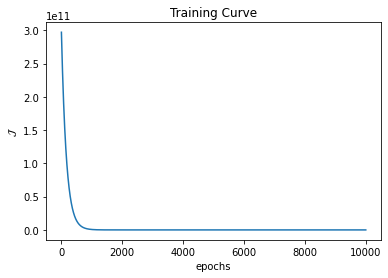

In [250]:
Reg.fit(X_range2Te, y_range2Te, epochs = 1e4, eta=1e-14, show_curve=True)

In [251]:
y_hatR2Te=Reg.predict(X_range2Te)

In [252]:
y_hatR2Tr=Reg.predict(X_range2Tr)

In [253]:
R2(y_range2Te,y_hatR2Te)

0.2900993451439755

In [224]:
R2(y_range2Tr,y_hatR2Tr)

0.526022097365239

### Range 3

In [157]:
X_range3 = range3_df[['sqrt_ft', 'bedrooms', 'lot_acres', 'N_F', 'sold_price']].copy()

In [158]:
XR3 = X_range3.to_numpy()
#XR2 = min_max_scaling(XR2)
random.shuffle(XR1)
trainR3_data = XR3[:int((len(XR3)+1)*.90)] #Remaining 90% to training set
testR3_data = XR3[int((len(XR3)+1)*.90):] #Splits 10% data to test set

In [159]:
X_range4 = range4_df[['sqrt_ft', 'bedrooms', 'lot_acres', 'N_F', 'sold_price']].copy()

In [160]:
X_range3 = X_range3.to_numpy()

In [161]:
X_range4 = X_range4.to_numpy()

In [162]:
y_range3Tr=trainR3_data[:,0]

In [163]:
X_range3Tr=trainR3_data[:,1:]

In [164]:
y_range3Te=testR3_data[:,0]

In [165]:
X_range3Te=testR3_data[:,1:]

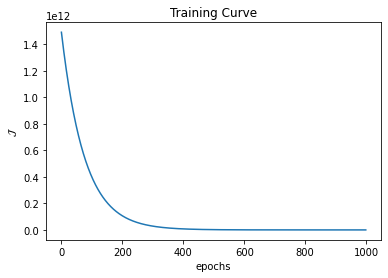

In [166]:
Reg.fit(X_range3Te, y_range3Te, epochs = 1e3, eta=1e-14, show_curve=True)

In [167]:
y_hatR3Te=Reg.predict(X_range3Te)

In [168]:
y_hatR3Tr=Reg.predict(X_range3Tr)

In [169]:
R2(y_range3Te,y_hatR3Te)

-15.290192707540399

In [170]:
R2(y_range3Tr,y_hatR3Tr)

-0.29877036958796244

In [171]:
X_range4.shape

(15, 5)